####Business Analytics Term project

#**Exploratory Data Analysis with ERP Beverage Dataset**

In [ ]:
# import necessary libraries (Pandas , Numpy , matplotlib , scikit-learn, seaborn  )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [ ]:
# Firstly store "ERP_Beverage_Data_Medium" file in Your Google Drive to run the following code block
# connect with google drive (to get data from google drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get each csv file and assign it in the variable
# variable_name = call pandas read_csv function ("file paths")
customer = pd.read_csv("/content/drive/MyDrive/ERP_Beverage_Data_Medium/CustomerMaster.csv")
inventory = pd.read_csv("/content/drive/MyDrive/ERP_Beverage_Data_Medium/InventoryBalances.csv")
product = pd.read_csv("/content/drive/MyDrive/ERP_Beverage_Data_Medium/ProductMaster.csv")
pline = pd.read_csv("/content/drive/MyDrive/ERP_Beverage_Data_Medium/ProductionLineMaster.csv")
porder = pd.read_csv("/content/drive/MyDrive/ERP_Beverage_Data_Medium/ProductionOrders.csv")
sales = pd.read_csv("/content/drive/MyDrive/ERP_Beverage_Data_Medium/SalesOrders.csv")
supplier = pd.read_csv("/content/drive/MyDrive/ERP_Beverage_Data_Medium/SupplierMaster.csv")
wh = pd.read_csv("/content/drive/MyDrive/ERP_Beverage_Data_Medium/WarehouseMaster.csv")

In [ ]:
# in variable called dataframe : assign dictionary {} ,
#include {"key": value} where key is the name of dataframe and value is the dataframe table

dataframes = {"Customer":customer,
              "Inventory":inventory,"Product":product,"Product Line":pline,"Pruduct Order":porder,
              "Sales":sales,"Supplier":supplier,"Warehouse":wh}

In [ ]:
#shape return (rows,columns)
for name,df in dataframes.items():
    print(f"{name} : {df.shape}", end='\n\n')

Customer : (500, 5)

Inventory : (15000, 6)

Product : (25, 5)

Product Line : (10, 4)

Pruduct Order : (5000, 7)

Sales : (25000, 7)

Supplier : (100, 5)

Warehouse : (15, 4)



In [ ]:
#for a quick view for each table use .head()
for name,df in dataframes.items():
  print(f"{name}\n{df.head()}", end='\n\n')

Customer
   CustomerID                 CustomerName       CustomerCity CustomerCountry  \
0        2001                 Callahan Inc     Gilbertchester          Mexico   
1        2002  Aguirre, Baxter and Hopkins    East Nancymouth           Japan   
2        2003                Mcbride-Kelly       Timothymouth       Australia   
3        2004                   Oliver Inc  West Michelleland           Italy   
4        2005                Morrison-King           Boydfort              UK   

  PaymentTerms  
0        NET45  
1          COD  
2          COD  
3          COD  
4          EOM  

Inventory
   InventoryID  WarehouseID  ProductID  OnHand  OnOrder LastUpdated
0        30001         5010       1016    8279     2368  2025-11-26
1        30002         5007       1004   10829     2365  2025-02-20
2        30003         5009       1006    9405     2737  2025-03-01
3        30004         5010       1003   13334     2006  2025-04-14
4        30005         5003       1009    3914     

In [ ]:
#check there is a null values in each table
#isna() return Ture=1/False=0 , and sum them return (total number of 1 or True which is missing values cells)
for name,df in dataframes.items():
    print(f"{name}\n{customer.isna().sum()}", end='\n\n')

Customer
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Inventory
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Product
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Product Line
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Pruduct Order
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Sales
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Supplier
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Warehouse
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
Paym

In [ ]:
for name,df in dataframes.items():
    print(f"{name}\n{inventory.duplicated().sum()}", end='\n\n')

Customer
0

Inventory
0

Product
0

Product Line
0

Pruduct Order
0

Sales
0

Supplier
0

Warehouse
0



In [ ]:
for name,df in dataframes.items():
    print(name,end='\n\n')
    print(f"{df.info()}", end='\n\n')

Customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       500 non-null    Int64 
 1   CustomerName     500 non-null    string
 2   CustomerCity     500 non-null    string
 3   CustomerCountry  500 non-null    string
 4   PaymentTerms     500 non-null    string
dtypes: Int64(1), string(4)
memory usage: 20.1 KB
None

Inventory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InventoryID  15000 non-null  int64         
 1   WarehouseID  15000 non-null  int64         
 2   ProductID    15000 non-null  int64         
 3   OnHand       15000 non-null  int64         
 4   OnOrder      15000 non-null  int64         
 5   LastUpdated  15000 non-null  datetime64[ns]
dtyp

In [ ]:
for name in dataframes:
    dataframes[name]= dataframes[name].convert_dtypes()

In [ ]:
for name,df in dataframes.items():
    print(name,end='\n\n')
    print(f"{df.info()}", end='\n\n')

Customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       500 non-null    Int64 
 1   CustomerName     500 non-null    string
 2   CustomerCity     500 non-null    string
 3   CustomerCountry  500 non-null    string
 4   PaymentTerms     500 non-null    string
dtypes: Int64(1), string(4)
memory usage: 20.1 KB
None

Inventory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InventoryID  15000 non-null  Int64         
 1   WarehouseID  15000 non-null  Int64         
 2   ProductID    15000 non-null  Int64         
 3   OnHand       15000 non-null  Int64         
 4   OnOrder      15000 non-null  Int64         
 5   LastUpdated  15000 non-null  datetime64[ns]
dtyp

In [ ]:
inventory['LastUpdated'] = pd.to_datetime(inventory['LastUpdated'])
dataframes['Inventory'] = inventory
print(inventory.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InventoryID  15000 non-null  int64         
 1   WarehouseID  15000 non-null  int64         
 2   ProductID    15000 non-null  int64         
 3   OnHand       15000 non-null  int64         
 4   OnOrder      15000 non-null  int64         
 5   LastUpdated  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 703.3 KB
None


In [ ]:
porder['ProductionDate'] = pd.to_datetime(porder['ProductionDate'])
dataframes['Product Order'] = porder
print(porder.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ProductionOrderID    5000 non-null   int64         
 1   ProductionLineID     5000 non-null   int64         
 2   ProductID            5000 non-null   int64         
 3   ProductionDate       5000 non-null   datetime64[ns]
 4   BatchSize            5000 non-null   int64         
 5   UnitCost             5000 non-null   float64       
 6   TotalProductionCost  5000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 273.6 KB
None


In [ ]:
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
dataframes['Sales'] = sales
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SalesOrderID  25000 non-null  int64         
 1   OrderDate     25000 non-null  datetime64[ns]
 2   CustomerID    25000 non-null  int64         
 3   ProductID     25000 non-null  int64         
 4   Quantity      25000 non-null  int64         
 5   UnitPrice     25000 non-null  float64       
 6   TotalAmount   25000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 1.3 MB
None


In [ ]:
#(2174,2559,544,640)

In [ ]:
# for name, df in dataframes.items():
#     print(name, end='\n')
#     print(f"{df.describe()}", end='\n\n')

#     # Distribution of numeric columns
#     numeric_cols = df.select_dtypes(include="number").columns
#     numeric_cols = [col for col in numeric_cols if not col.endswith("ID")]  # Exclude columns ending with 'ID'

#     if numeric_cols:
#         df[numeric_cols].hist()
#         plt.suptitle(f"Numeric Column Distributions for {name}")
#         plt.show()

#     # Bar chart for categorical data
#     for col in df.select_dtypes(include="string").columns:
#         if col.endswith("ID"):  # Skip categorical columns ending with 'ID'
#             print(f"Skipping plot for column '{col}' as it ends with 'ID'.")
#             continue

#         if df[col].nunique() < 20:  # For small cardinality
#             sns.countplot(data=df, y=col, order=df[col].value_counts().index)
#             plt.title(f"Distribution of {col} in {name}")
#             plt.show()
#         # else:  # For large cardinality
#         #     top_categories = df[col].value_counts().head(10)
#         #     sns.barplot(x=top_categories.values, y=top_categories.index)
#         #     plt.title(f"Top 10 {col} in {name}")
#         #     plt.xlabel("Frequency")
#         #     plt.show()
print()

In [ ]:
# for name, df in dataframes.items():
#     print(name, end='\n')
#     print(f"{df.describe()}", end='\n\n')

#     # Distribution of numeric columns
#     numeric_cols = df.select_dtypes(include="number").columns
#     numeric_cols = [col for col in numeric_cols if not col.endswith("ID")]
# # Generate pair plot
#     if len(numeric_cols) > 1:  # Ensure at least 2 numeric columns for pair plot
#         sns.pairplot(df[numeric_cols], height=1.5)
#         plt.suptitle("Pair Plot for Numeric Columns", y=1.02)
#         plt.show()
#     else:
#         print("Not enough numeric columns for a pair plot.")

print()

In [ ]:
for name, df in dataframes.items():
    print(name, end='\n')
    print(f"{df.describe()}", end='\n\n')


Customer
       CustomerID
count       500.0
mean       2250.5
std    144.481833
min        2001.0
25%       2125.75
50%        2250.5
75%       2375.25
max        2500.0

Inventory
        InventoryID   WarehouseID     ProductID        OnHand       OnOrder  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean   37500.500000   5008.012467   1013.031400  10017.517467   2502.751333   
min    30001.000000   5001.000000   1001.000000      2.000000      0.000000   
25%    33750.750000   5004.000000   1007.000000   4973.500000   1254.000000   
50%    37500.500000   5008.000000   1013.000000  10007.000000   2506.000000   
75%    41250.250000   5012.000000   1019.000000  15126.500000   3759.000000   
max    45000.000000   5015.000000   1025.000000  19999.000000   5000.000000   
std     4330.271354      4.320612      7.210049   5832.702310   1444.128129   

                      LastUpdated  
count                       15000  
mean   2024-07-04 00:33:01.440000 

No numeric columns (excluding 'ID' columns) found in Customer.


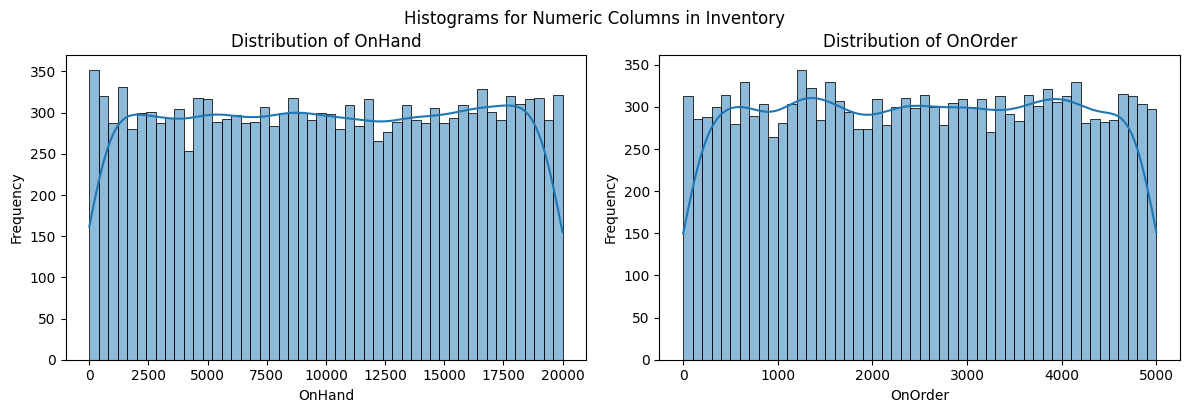

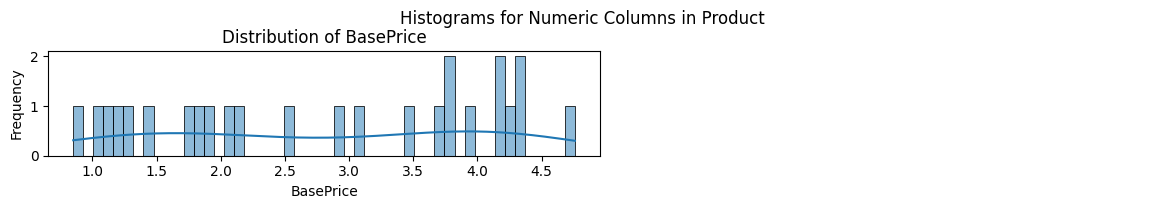

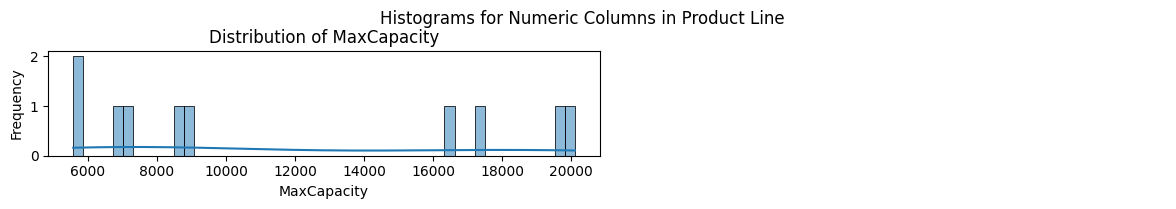

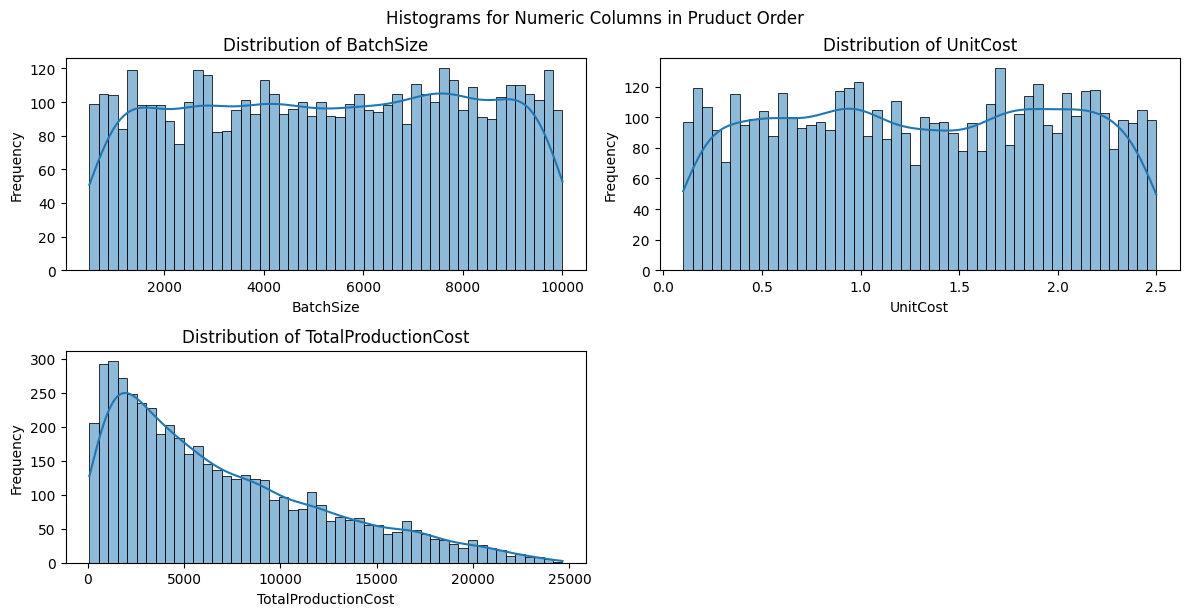

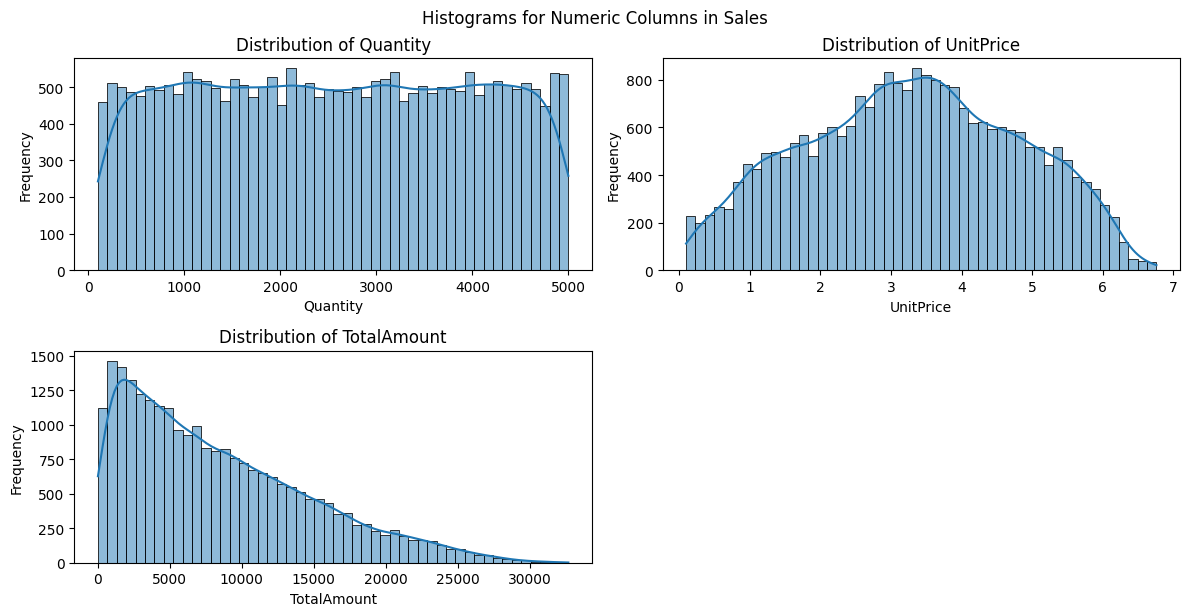

No numeric columns (excluding 'ID' columns) found in Supplier.


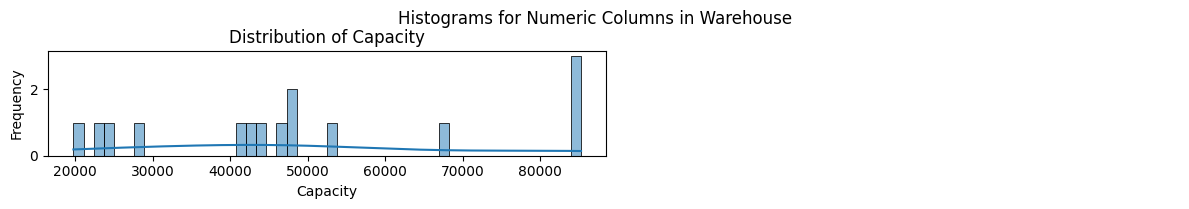

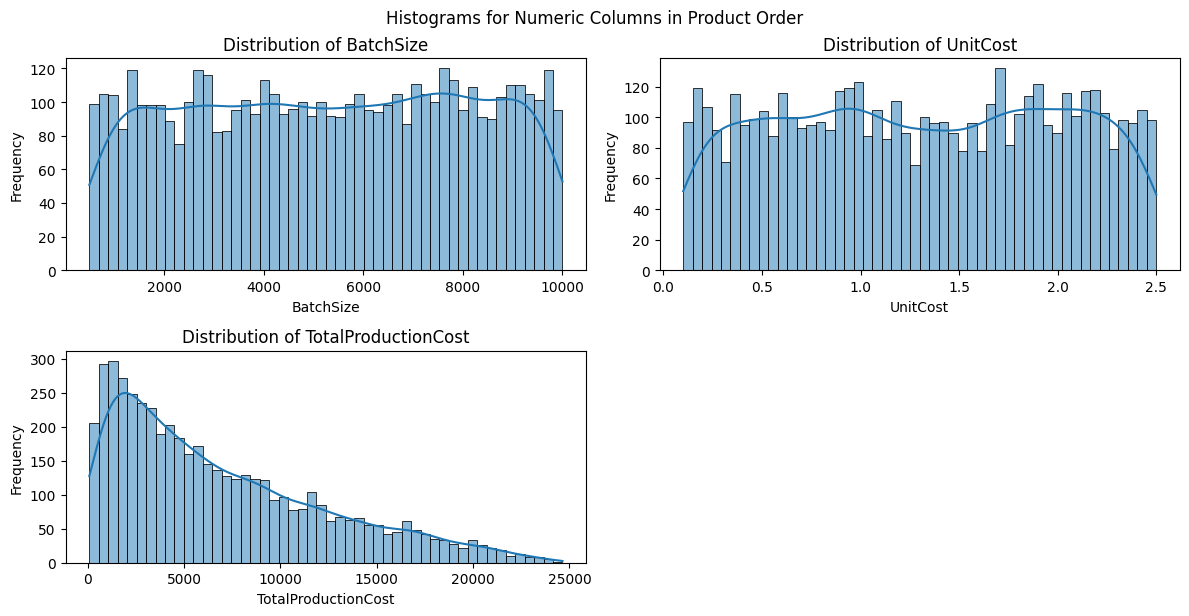

In [ ]:
for name, df in dataframes.items():
    # Filter numeric columns and exclude those ending with 'ID'
    numeric_cols = df.select_dtypes(include="number").columns
    numeric_cols = [col for col in numeric_cols if not col.endswith("ID")]

    # Generate histograms for numeric columns
    if numeric_cols:
        num_cols = len(numeric_cols)

        # Create a figure with subplots
        fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(12, num_cols * 2))

        # Flatten axes for easy iteration
        axes = axes.flatten()

        for i, column in enumerate(numeric_cols):
            sns.histplot(df[column], bins=50, kde=True, ax=axes[i], edgecolor='black')
            axes[i].set_title(f'Distribution of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')

        # Turn off any unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.suptitle(f"Histograms for Numeric Columns in {name}", y=1.02)
        plt.show()
    else:
        print(f"No numeric columns (excluding 'ID' columns) found in {name}.")
